In [4]:
import json
from pprint import pprint
import pandas as pd
import operator
import seaborn as sns
import matplotlib

# load bmeg output
individual_treatments = json.load(open('/util/bmeg/biostream/biostream/g2p/individual-treatments.json'))


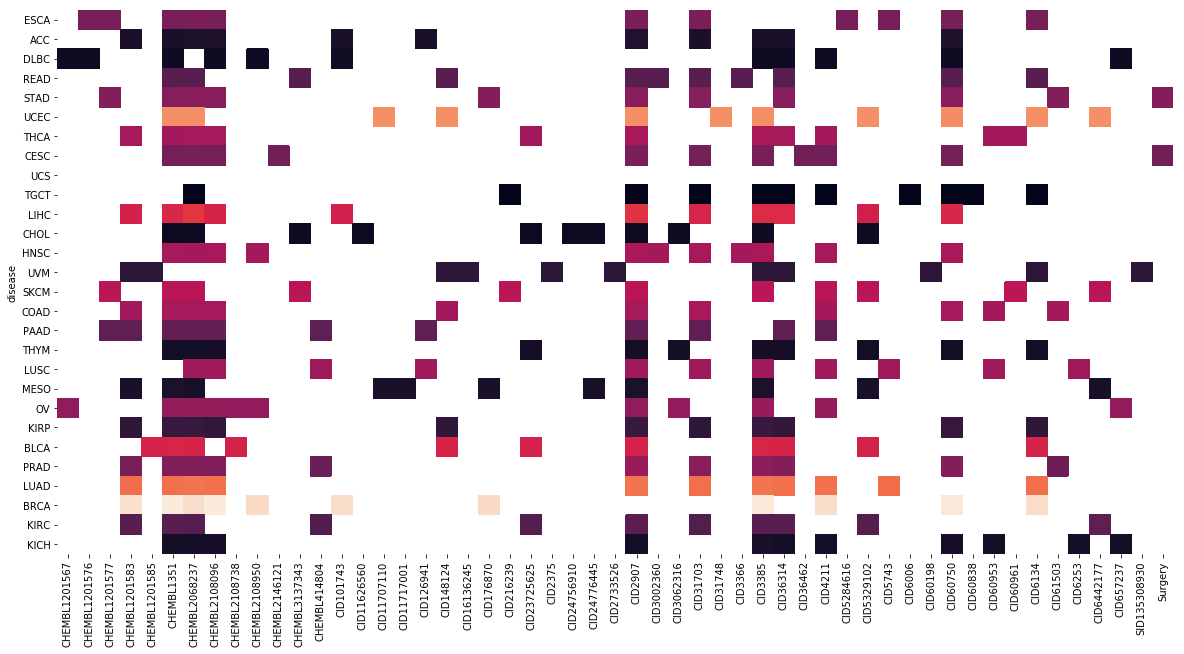

In [5]:

# for potential compounds, lets summarize by individual.disease
disease_potential_treatments = {}
for c,individual_treatment in enumerate(individual_treatments):
    potentials = individual_treatment.get('potential',None) or []
    if individual_treatment['disease'] not in disease_potential_treatments:
        disease_potential_treatments[individual_treatment['disease']] = {}
    disease = disease_potential_treatments[individual_treatment['disease']]   
    for potential_compound in potentials:
        if potential_compound not in disease:
           disease[potential_compound] = 0
        disease[potential_compound] += 1     
        

# now lets create an array of flattened objects, keyed by disease , each with top 10
def top_N(mydict, target, limit=10):
    sorted_mydict = sorted(mydict.items(), key=operator.itemgetter(1), reverse=True)        
    for c,t in enumerate(sorted_mydict):
        if c > limit:
            break
        # strip off 'compound:' for chart    
        target[t[0].replace('compound:','')] = t[1]   

disease_top_potential_treatments = []        
for k in disease_potential_treatments:
    d = {'disease': k}
    top_N(disease_potential_treatments[k],d)
    disease_top_potential_treatments.append(d)


# load it into panda to plot    
df = pd.DataFrame(data=disease_top_potential_treatments)
df = df.set_index('disease')

%matplotlib inline
matplotlib.rcParams['figure.figsize']  = [20,10]
sns.heatmap(df, cbar=False)

